## 시각화를 위한 설정

In [1]:
import openpyxl # excel 사용
import requests # 주소 긁어오기
from bs4 import BeautifulSoup # 이쁘게 다듬기 
import re
import time
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# from urllib.request import urlopen
# webpage = urlopen('https://www.thinkcontest.com/Contest/ContestDetail.html?id=1')
# soup = BeautifulSoup(webpage.content, "html.parser")

### 자료별로 사용한 함수들
* crawling_tg(add) : 시상금액 규모별 공모전 정보
    * add : address 
  
* craw(p, c) : 한번에 긁어오기 위해 사용
    * p: page, c: 종류(5천만원 이상, 3000~ 5000만원 etc)

In [2]:
def crawling_tg(add):
    webpage = requests.get(add)
    soup = BeautifulSoup(webpage.content, "html.parser")
    men = soup.find_all(attrs={'class':"txt-left"})
    wb = openpyxl.Workbook()
    sheet = wb.active
    sheet.append(['공모명','분류','기간','조회수'])
    l1=[]
    l2=[]
    l3=[]
    l4=[]


    for i in men:
        l1.append(i.select_one('a').get_text())
        l2.append(i.select_one('.contest-cate').get_text())

    for i in soup.find_all('td'):
        if '~' in i.text:
            l3.append(i.get_text())

        if (i.text.isdigit()):
            l4.append(i.get_text())

    men_list=list(map(lambda x1,x2,x3,x4:[x1,x2,x3,x4], l1,l2,l3,l4))
    
    
    for i in men_list:
        sheet.append(i)
    
    wb.save('data'+str(add)[-1]+'.xlsx')

In [3]:
def craw(p, c):
    sheet_space=[[] for i in range(p)]
    for k in range(1, p+1):

        st_time =time.time()

        webpage = requests.get('https://www.thinkcontest.com/Contest/CateReward.html?page='+str(k)+'&c='+str(c))
        soup = BeautifulSoup(webpage.content, "html.parser")
        men = soup.find_all(attrs={'class':"txt-left"})
        wb = openpyxl.Workbook()
        sheet = wb.active
        sheet.append(['공모명','분류','기간','조회수'])
        l1=[]
        l2=[]
        l3=[]
        l4=[]


        for i in men:
            l1.append(i.select_one('a').get_text())
            l2.append(i.select_one('.contest-cate').get_text())

        for i in soup.find_all('td'):
            if '~' in i.text:
                l3.append(i.get_text())

            if (i.text.isdigit()):
                l4.append(i.get_text())

        men_list=list(map(lambda x1,x2,x3,x4:[x1,x2,x3,x4], l1,l2,l3,l4))

        for men in men_list:
            sheet_space[k-1].append(men)

        if k%10==0:
            ed_time =time.time()-st_time
            print("\r남은 개수 :",k,"/",p,"\t\t남은 시간 :",round(ed_time*(p-k-1),2),"\t\t",end='')

    for r in range(p):
        for q in range(len(sheet_space[r])):
            sheet.append(sheet_space[r][q])

    wb.save('.data'+str(c)+'.xlsx')
    
# craw(47, 1)
# craw(41, 2)
# craw(256, 3)
# craw(811, 4)

### 데이터 불러오기

In [5]:
import pandas as pd

df_1_origin = pd.read_excel('data1.xlsx')
df_2_origin = pd.read_excel('data2.xlsx')
df_3_origin = pd.read_excel('data3.xlsx')
df_4_origin = pd.read_excel('data4.xlsx')

In [6]:
# 원본 보호
df_1 = df_1_origin.copy()
df_2 = df_2_origin.copy()
df_3 = df_3_origin.copy()
df_4 = df_4_origin.copy()

In [9]:
# 년도별 데이터 프레임 생성
raw_data = {
    '기준년도' : [20161231, 20171231, 20181231, 20191231, 20201231],
    
    '1000' : [sum(df_4['기간'].apply(lambda x: x[:4]=='2016')), sum(df_4['기간'].apply(lambda x: x[:4]=='2017')),
               sum(df_4['기간'].apply(lambda x: x[:4]=='2018')), sum(df_4['기간'].apply(lambda x: x[:4]=='2019')),
               sum(df_4['기간'].apply(lambda x: x[:4]=='2020'))],
    
    '1000-3000' : [sum(df_3['기간'].apply(lambda x: x[:4]=='2016')), sum(df_3['기간'].apply(lambda x: x[:4]=='2017')),
               sum(df_3['기간'].apply(lambda x: x[:4]=='2018')), sum(df_3['기간'].apply(lambda x: x[:4]=='2019')),
               sum(df_3['기간'].apply(lambda x: x[:4]=='2020'))],
    
    '3000-5000' : [sum(df_2['기간'].apply(lambda x: x[:4]=='2016')), sum(df_2['기간'].apply(lambda x: x[:4]=='2017')),
               sum(df_2['기간'].apply(lambda x: x[:4]=='2018')), sum(df_2['기간'].apply(lambda x: x[:4]=='2019')),
               sum(df_2['기간'].apply(lambda x: x[:4]=='2020'))],
    
    '5000' : [sum(df_1['기간'].apply(lambda x: x[:4]=='2016')), sum(df_1['기간'].apply(lambda x: x[:4]=='2017')),
               sum(df_1['기간'].apply(lambda x: x[:4]=='2018')), sum(df_1['기간'].apply(lambda x: x[:4]=='2019')),
               sum(df_1['기간'].apply(lambda x: x[:4]=='2020'))],
}
data_total = pd.DataFrame(raw_data)
data_total['기준년도'] = pd.to_datetime(data_total['기준년도'], format='%Y%m%d')

### 시각화

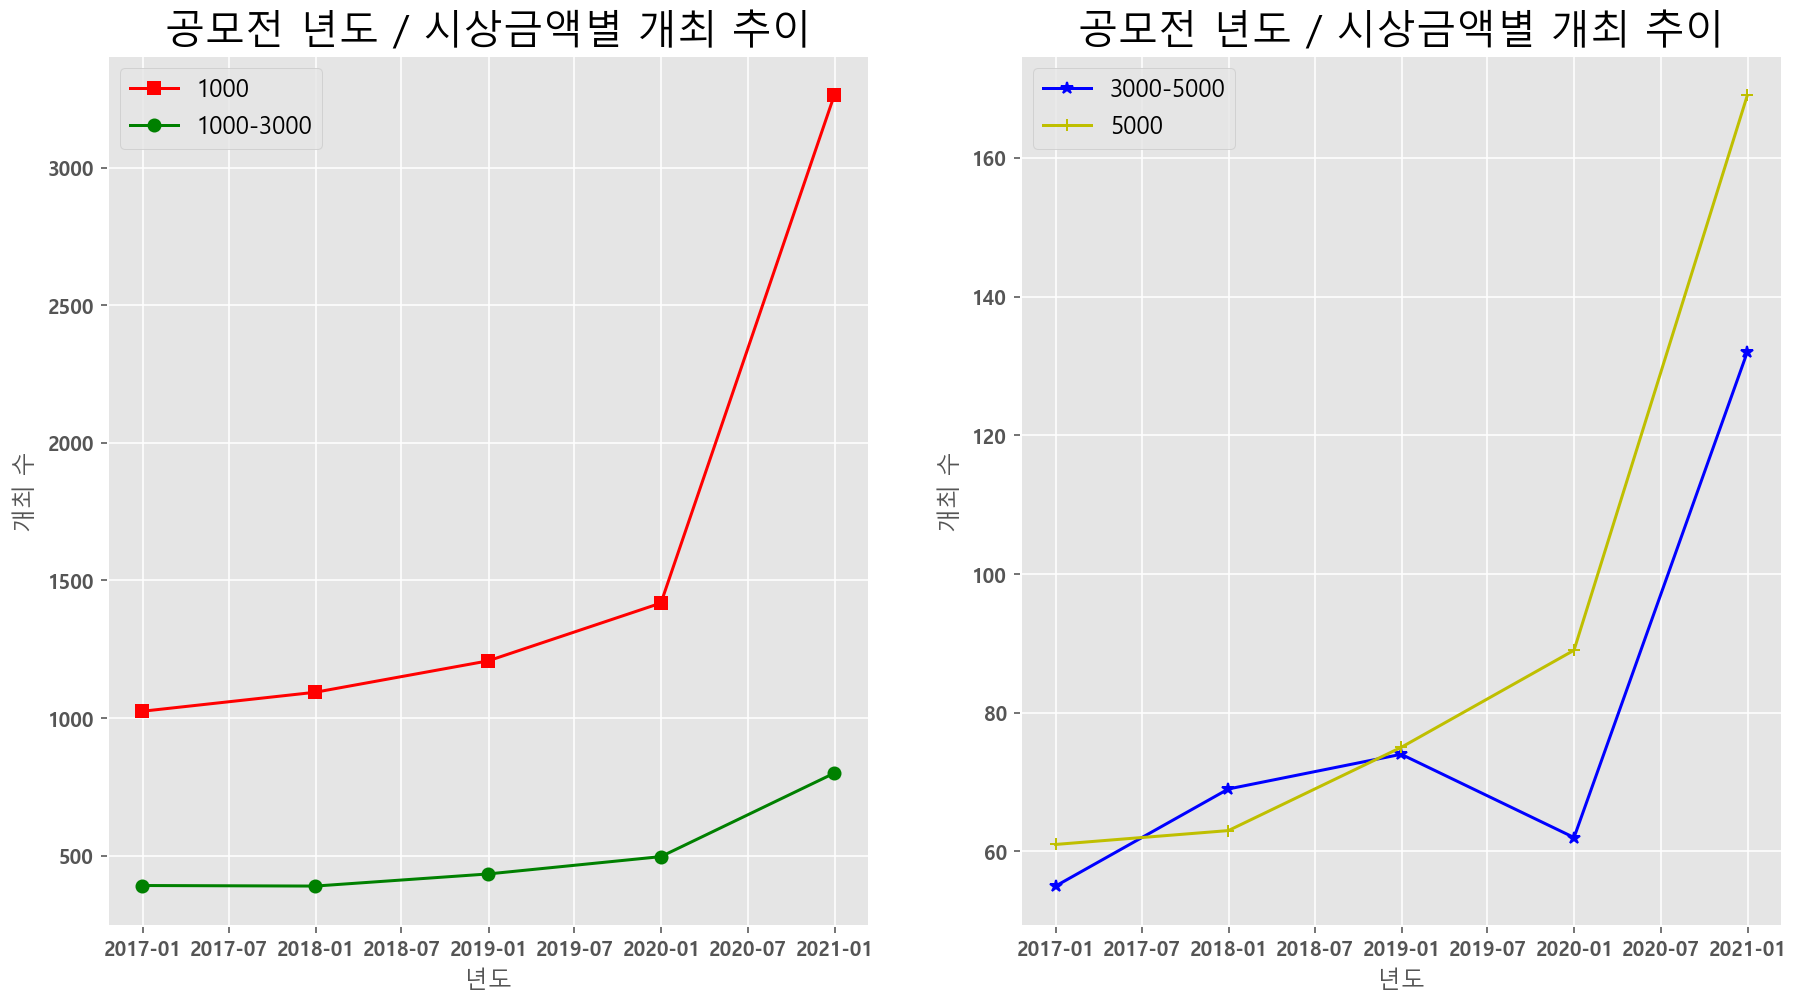

In [11]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.plot(data_total['기준년도'], data_total['1000'], marker='s', color='r')
plt.plot(data_total['기준년도'], data_total['1000-3000'], marker='o', color='g')

plt.title('공모전 년도 / 시상금액별 개최 추이', fontsize=20)
plt.ylabel('개최 수', fontsize=12)
plt.xlabel('년도', fontsize=12)

plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.legend(fontsize=12, labels=('1000', '1000-3000'), loc='best')


plt.subplot(122)
plt.plot(data_total['기준년도'], data_total['3000-5000'], marker='*', color='b')
plt.plot(data_total['기준년도'], data_total['5000'], marker='+', color='y')

plt.title('공모전 년도 / 시상금액별 개최 추이', fontsize=20)
plt.ylabel('개최 수', fontsize=12)
plt.xlabel('년도', fontsize=12)

plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.legend(fontsize=12, labels=('3000-5000', '5000'), loc='best')

plt.show()

### 머신러닝을 이용한 시각화

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [17]:
# 365
predict_date = data_total['기준년도'].map(datetime.datetime.toordinal)

ENreg1 = ElasticNet(alpha=0.7, l1_ratio=0.5, normalize=False)
ENreg1.fit(predict_date[3:].values.reshape(-1,1), data_total['1000'][3:])

EN_predict1 = int(np.round(ENreg1.predict([[predict_date[4]+1085]]), 0))

ENreg2 = ElasticNet(alpha=0.7, l1_ratio=0.5, normalize=False)
ENreg2.fit(predict_date[3:].values.reshape(-1,1), data_total['1000-3000'][3:])

EN_predict2 = int(np.round(ENreg2.predict([[predict_date[4]+1085]]), 0))

ENreg3 = ElasticNet(alpha=0.7, l1_ratio=0.5, normalize=False)
ENreg3.fit(predict_date[3:].values.reshape(-1,1), data_total['3000-5000'][3:])

EN_predict3 = int(np.round(ENreg3.predict([[predict_date[4]+1085]]), 0))

ENreg4 = ElasticNet(alpha=0.7, l1_ratio=0.5, normalize=False)
ENreg4.fit(predict_date[3:].values.reshape(-1,1), data_total['5000'][3:])

EN_predict4 = int(np.round(ENreg4.predict([[predict_date[4]+1085]]), 0))

predict_list = [pd.to_datetime(20211231, format='%Y%m%d'), EN_predict1, EN_predict2, EN_predict3, EN_predict4]

In [18]:
predict_total = data_total.copy()

In [19]:
predict_total.loc[5] = predict_list
predict_total

,기준년도,1000,1000-3000,3000-5000,5000
0,2016-12-31,1025,392,55,61
1,2017-12-31,1094,390,69,63
2,2018-12-31,1208,434,74,75
3,2019-12-31,1418,497,62,89
4,2020-12-31,3262,800,132,169
5,2021-12-31,8728,1698,339,406


### ElasticNet을 이용한 시각화

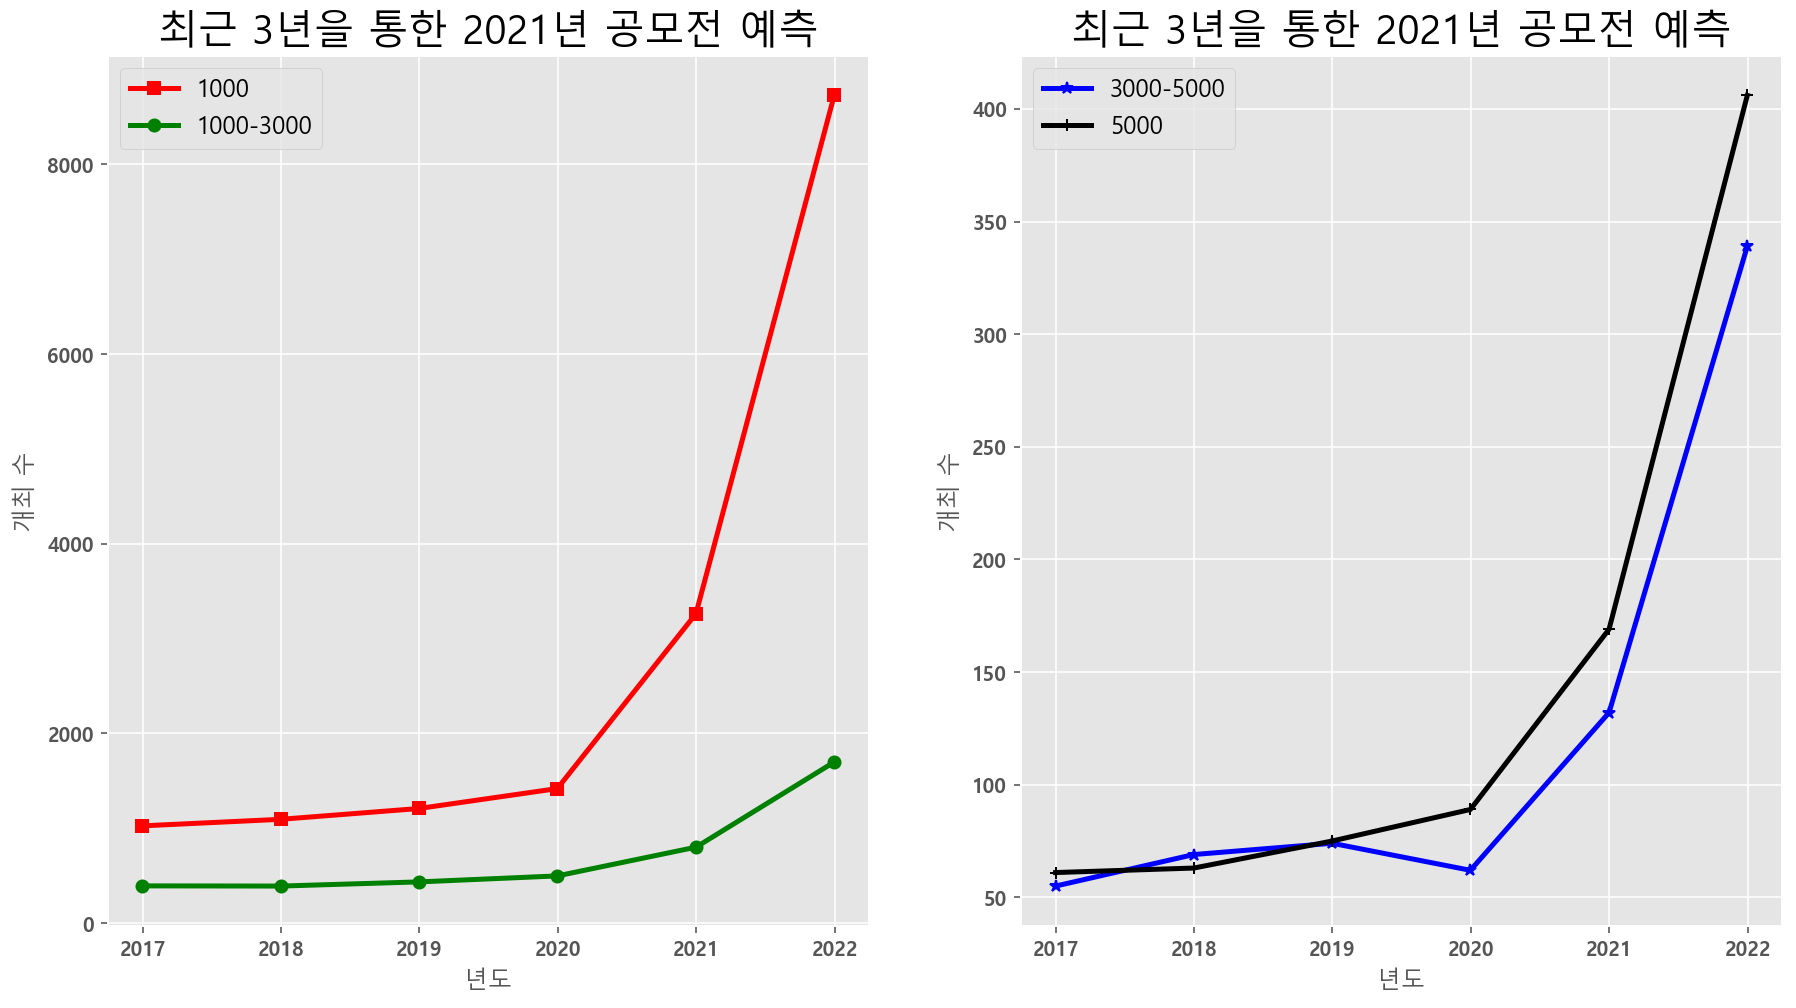

In [20]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.plot(predict_total['기준년도'], predict_total['1000'], marker='s', color='r', linewidth=2.5)
plt.plot(predict_total['기준년도'], predict_total['1000-3000'], marker='o', color='g', linewidth=2.5)

plt.title('최근 3년을 통한 2021년 공모전 예측', fontsize=20)
plt.ylabel('개최 수', fontsize=12)
plt.xlabel('년도', fontsize=12)

plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.legend(fontsize=12, labels=('1000', '1000-3000'), loc='best')


plt.subplot(122)
plt.plot(predict_total['기준년도'], predict_total['3000-5000'], marker='*', color='b', linewidth=2.5)
plt.plot(predict_total['기준년도'], predict_total['5000'], marker='+', color='k', linewidth=2.5)

plt.title('최근 3년을 통한 2021년 공모전 예측', fontsize=20)
plt.ylabel('개최 수', fontsize=12)
plt.xlabel('년도', fontsize=12)

plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.legend(fontsize=12, labels=('3000-5000', '5000'), loc='best')

plt.show()

## LinearRegression, Ridge, Lasso, ElasticNet(Ridge와 Lasso의 혼합)

In [ ]:
# line_fitter = LinearRegression()
# line_fitter.fit(predict_date.values.reshape(-1,1), data_total['1000'])

# linear_predict = int(np.round(line_fitter.predict([[predict_date[4]+365]]), 0))

# ridgeRge = Ridge(alpha=0.5, normalize=True)
# ridgeRge.fit(predict_date.values.reshape(-1,1), data_total['1000'])

# ridge_predict = ridgeRge.predict([[predict_date[4]+365]])
# ridge_predict

# lassoReg = Lasso(alpha=0.5, normalize=True)
# lassoReg.fit(predict_date.values.reshape(-1,1), data_total['1000'])

# lasso_predict = lassoReg.predict([[predict_date[4]+365]])
# lasso_predict

# ENreg = ElasticNet(alpha=0.5, l1_ratio=1, normalize=False)
# ENreg.fit(predict_date.values.reshape(-1,1), data_total['1000'])

# EN_predict = ENreg.predict([[predict_date[4]+365]])
# EN_predict